In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


#Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Training/all_training_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Questions,Answers,Focus,Qtypes,Synonym,source,url,cui,SemanticType,SemanticGroup
0,0,what is (are) chronic lymphocytic leukemia ?,Key Points\n - Chronic lymp...,Chronic Lymphocytic Leukemia,information,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
1,1,who is at risk for chronic lymphocytic leukemi...,Older age can affect the risk of developing ch...,Chronic Lymphocytic Leukemia,susceptibility,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
2,2,what are the symptoms of chronic lymphocytic l...,Signs and symptoms of chronic lymphocytic leuk...,Chronic Lymphocytic Leukemia,symptoms,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
3,3,how to diagnose chronic lymphocytic leukemia ?,"Tests that examine the blood, bone marrow, and...",Chronic Lymphocytic Leukemia,exams and tests,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
4,4,what is the outlook for chronic lymphocytic le...,Certain factors affect treatment options and p...,Chronic Lymphocytic Leukemia,outlook,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47441 entries, 0 to 47440
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     47441 non-null  int64 
 1   Questions      47441 non-null  object
 2   Answers        16407 non-null  object
 3   Focus          47427 non-null  object
 4   Qtypes         47441 non-null  object
 5   Synonym        24669 non-null  object
 6   source         47436 non-null  object
 7   url            47436 non-null  object
 8   cui            31417 non-null  object
 9   SemanticType   31375 non-null  object
 10  SemanticGroup  31417 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [ ]:
df.describe()

,Unnamed: 0
count,47441.000000
mean,23720.000000
std,13695.181397
min,0.000000
25%,11860.000000
50%,23720.000000
75%,35580.000000
max,47440.000000


In [ ]:
#We'll drop the index column as it is redundant
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Questions,Answers,Focus,Qtypes,Synonym,source,url,cui,SemanticType,SemanticGroup
0,what is (are) chronic lymphocytic leukemia ?,Key Points\n - Chronic lymp...,Chronic Lymphocytic Leukemia,information,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
1,who is at risk for chronic lymphocytic leukemi...,Older age can affect the risk of developing ch...,Chronic Lymphocytic Leukemia,susceptibility,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
2,what are the symptoms of chronic lymphocytic l...,Signs and symptoms of chronic lymphocytic leuk...,Chronic Lymphocytic Leukemia,symptoms,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
3,how to diagnose chronic lymphocytic leukemia ?,"Tests that examine the blood, bone marrow, and...",Chronic Lymphocytic Leukemia,exams and tests,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
4,what is the outlook for chronic lymphocytic le...,Certain factors affect treatment options and p...,Chronic Lymphocytic Leukemia,outlook,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders


In [ ]:
#Dataframe size
df.shape

(47441, 10)

In [ ]:
df.columns

Index(['Questions', 'Answers', 'Focus', 'Qtypes', 'Synonym', 'source', 'url',
       'cui', 'SemanticType', 'SemanticGroup'],
      dtype='object')

## Check null values

In [ ]:
#Check the summation of missing values
total_nulls=df.isnull().sum()
total_nulls

Questions            0
Answers          31034
Focus               14
Qtypes               0
Synonym          22772
source               5
url                  5
cui              16024
SemanticType     16066
SemanticGroup    16024
dtype: int64

In [ ]:
null_percent=(total_nulls/df.isnull().count()*100)

#Let's sort the attributes in descending order according to their missing values
missing_data=pd.DataFrame({'Total_Missing':total_nulls,'Missing_Percent': null_percent})
missing_data=missing_data.sort_values(by='Total_Missing', ascending=False)
missing_data

,Total_Missing,Missing_Percent
Answers,31034,65.415990
Synonym,22772,48.000675
SemanticType,16066,33.865222
cui,16024,33.776691
SemanticGroup,16024,33.776691
Focus,14,0.029510
source,5,0.010539
url,5,0.010539
Questions,0,0.000000
Qtypes,0,0.000000


In [ ]:
columns=missing_data['Missing_Percent'].index.tolist()
len(columns[:-2])

8

In [ ]:
sorted_counts = missing_data['Missing_Percent'].tolist()
len(sorted_counts[:-2])

8

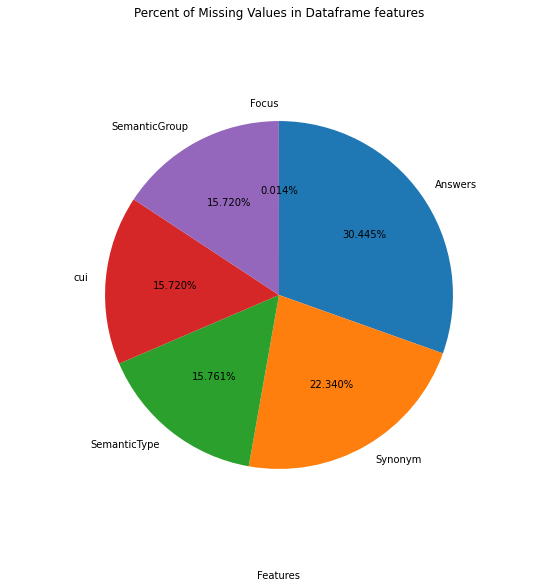

In [ ]:
plt.figure(figsize=[10,10])
sorted_counts = missing_data['Missing_Percent'].tolist()
plt.pie(sorted_counts[:-4], labels = columns[:-4],  autopct='%.3f%%', startangle = 90, counterclock = False,radius=0.8);
plt.title('Percent of Missing Values in Dataframe features')
plt.xlabel('Features')
plt.show()


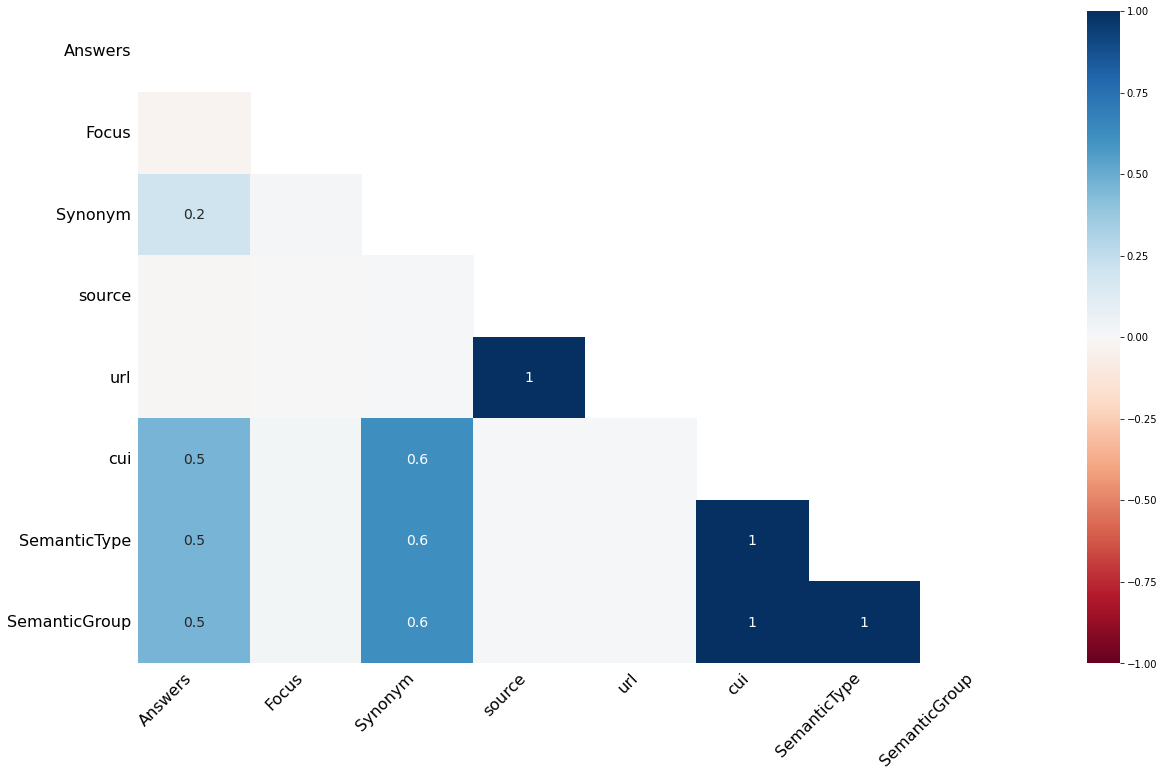

In [ ]:
#Correlation Analysis of missing values
msno.heatmap(df);

There are two columns contain null values: `'Answers'` and `'Focus'`

Column `'Answers'` has 31034 missing records which means this record has no useful informartion for us so we will drop it.

#Checking Duplicates
We will focus only on question and answer

In [ ]:
#Summtion of full duplicates
df.duplicated().sum()

561

In [ ]:
#Full duplicates
df[df.duplicated()]

,Questions,Answers,Focus,Qtypes,Synonym,source,url,cui,SemanticType,SemanticGroup
1567,what is (are) proctitis ?,Proctitis is inflammation of the lining of the...,Proctitis,information,NaN,NIDDK,http://www.niddk.nih.gov/health-information/he...,C0033246,T047,Disorders
1569,what causes proctitis ?,"Proctitis has many causes, including acute, or...",Proctitis,causes,NaN,NIDDK,http://www.niddk.nih.gov/health-information/he...,C0033246,T047,Disorders
1610,how to diagnose kidney disease of diabetes ?,People with diabetes should be screened regula...,Kidney Disease of Diabetes,exams and tests,NaN,NIDDK,http://www.niddk.nih.gov/health-information/he...,C0011860,T047,Disorders
1612,how to prevent kidney disease of diabetes ?,Blood Pressure Medicines\n \nSc...,Kidney Disease of Diabetes,prevention,NaN,NIDDK,http://www.niddk.nih.gov/health-information/he...,C0011860,T047,Disorders
1614,what to do for kidney disease of diabetes ?,- Diabetes is the leading cause of chronic kid...,Kidney Disease of Diabetes,considerations,NaN,NIDDK,http://www.niddk.nih.gov/health-information/he...,C0011860,T047,Disorders
...,...,...,...,...,...,...,...,...,...,...
47274,what to do for scrotal swelling ?,NaN,Scrotal swelling,considerations,<Synonym>Swelling of the scrotum</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0282005,T184,Disorders
47319,what are the treatments for chiropractic care ...,NaN,Chiropractic care for back pain,treatment,NaN,ADAM,https://www.nlm.nih.gov/medlineplus/ency/patie...,C0580931,T033,Disorders
47357,what to do for bleeding ?,NaN,Bleeding,considerations,<Synonym>Blood loss</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0019080,T046,Disorders
47358,what to do for bleeding ?,NaN,Bleeding,considerations,<Synonym>Blood loss</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0019080,T046,Disorders


In [ ]:
QA_df=df[['Questions','Answers']].copy()
QA_df[QA_df.duplicated()]

,Questions,Answers
1567,what is (are) proctitis ?,Proctitis is inflammation of the lining of the...
1569,what causes proctitis ?,"Proctitis has many causes, including acute, or..."
1610,how to diagnose kidney disease of diabetes ?,People with diabetes should be screened regula...
1612,how to prevent kidney disease of diabetes ?,Blood Pressure Medicines\n \nSc...
1614,what to do for kidney disease of diabetes ?,- Diabetes is the leading cause of chronic kid...
...,...,...
47274,what to do for scrotal swelling ?,NaN
47319,what are the treatments for chiropractic care ...,NaN
47357,what to do for bleeding ?,NaN
47358,what to do for bleeding ?,NaN


There are 586 duplicates of both questions and answers

In [ ]:
QA_df[QA_df.duplicated()]

### Question type column

In [ ]:
df['Qtypes'].value_counts()

information                                9214
symptoms                                   4338
treatment                                  3906
causes                                     2436
outlook                                    2232
exams and tests                            2058
when to contact a medical professional     1738
inheritance                                1446
precautions                                1413
side effects                               1301
other information                          1280
indication                                 1258
usage                                      1244
prevention                                 1239
brand names                                1238
emergency or overdose                      1140
complications                              1120
frequency                                  1120
storage and disposal                       1117
forget a dose                              1098
dietary                                 

In [ ]:
df['Qtypes'].nunique()

39

#Distribution of Question types.

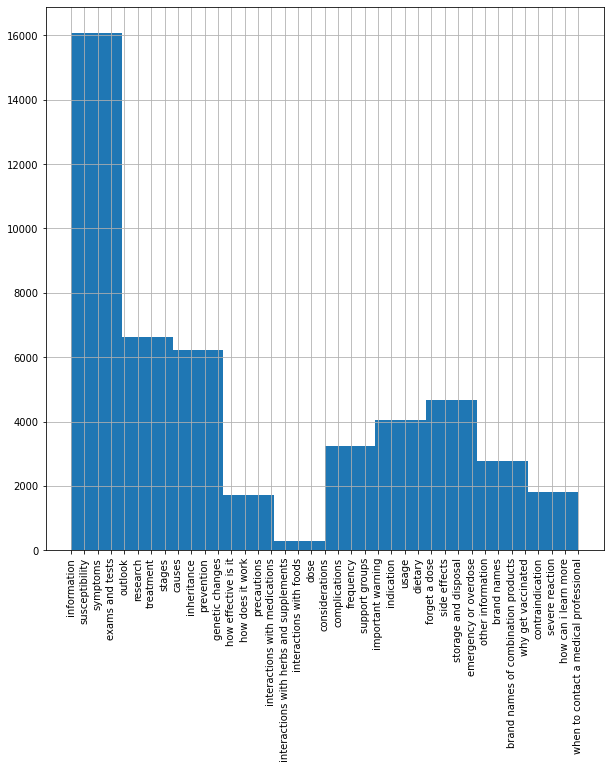

In [ ]:
plt.figure(figsize=[10,10]);
df['Qtypes'].hist();
plt.xticks(rotation = 90);

### What are the top 10 frequent question type asked?

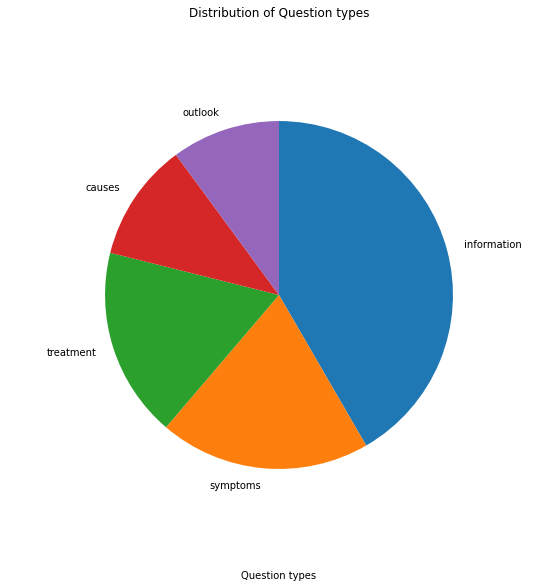

In [ ]:
plt.figure(figsize=[10,10])
sorted_counts = df['Qtypes'].value_counts().head()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,radius=0.8);
#top_Qtype=df['Qtypes'].value_counts().head(10).plot(kind='bar',alpha=0.5,color='blue')
plt.title('Distribution of Question types')
plt.xlabel('Question types')
plt.show()


In [ ]:
list(df['Qtypes'].value_counts()[:10].keys())

['information',
 'symptoms',
 'treatment',
 'causes',
 'outlook',
 'exams and tests',
 'when to contact a medical professional',
 'inheritance',
 'precautions',
 'side effects']

Top 10 question types are: `['information',
 'symptoms',
 'treatment',
 'causes',
 'outlook',
 'exams and tests',
 'when to contact a medical professional',
 'inheritance',
 'precautions',
 'side effects']`



In [ ]:
df['Focus'].nunique()

10537

###What are the top 10 frequent question focus?

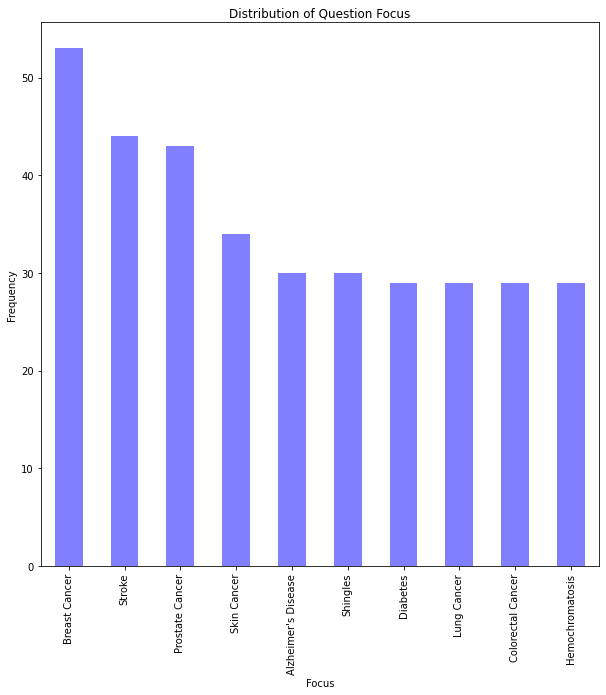

In [ ]:
plt.figure(figsize=[10,10])
top_Qtype=df['Focus'].value_counts().head(10).plot(kind='bar',alpha=0.5,color='blue')
plt.title('Distribution of Question Focus')
plt.xlabel('Focus')
plt.ylabel('Frequency')
plt.show()

In [ ]:
list(df['Focus'].value_counts()[:3].keys())

['Breast Cancer', 'Stroke', 'Prostate Cancer']

Top 10 question focus are: `['Breast Cancer',
 'Stroke',
 'Prostate Cancer',
 'Skin Cancer',
 "Alzheimer's Disease",
 'Shingles',
 'Diabetes',
 'Lung Cancer',
 'Colorectal Cancer',
 'Hemochromatosis']`
 

### What are the question types regarding the top 3 focus?

In [ ]:
df_qf=df[(df['Focus']=='Breast Cancer') | (df['Focus']=='Stroke') | (df['Focus']=='Prostate Cancer')]
df_qf
#df_qf=df[(df['Focus']=='Breast Cancer') | (df['Focus']=='Stroke') | (df['Focus']=='Prostate Cancer') | (df['Qtypes']=='information') | (df['Qtypes']=='symptoms') | (df['Qtypes']=='treatment')]

,Questions,Answers,Focus,Qtypes,Synonym,source,url,cui,SemanticType,SemanticGroup
133,what is (are) breast cancer ?,Key Points\n - Breast cance...,Breast Cancer,information,NaN,CancerGov,https://www.cancer.gov/types/breast/patient/br...,C0006142,T191,Disorders
134,how to prevent breast cancer ?,Key Points\n - Avoiding ris...,Breast Cancer,prevention,NaN,CancerGov,https://www.cancer.gov/types/breast/patient/br...,C0006142,T191,Disorders
135,who is at risk for breast cancer? ?,Key Points\n - Avoiding ris...,Breast Cancer,susceptibility,NaN,CancerGov,https://www.cancer.gov/types/breast/patient/br...,C0006142,T191,Disorders
136,what research (or clinical trials) is being do...,Cancer prevention clinical trials are used to ...,Breast Cancer,research,NaN,CancerGov,https://www.cancer.gov/types/breast/patient/br...,C0006142,T191,Disorders
137,what is (are) breast cancer ?,Key Points\n - Breast cance...,Breast Cancer,information,NaN,CancerGov,https://www.cancer.gov/types/breast/patient/pr...,C0006142,T191,Disorders
...,...,...,...,...,...,...,...,...,...,...
45259,what are the treatments for stroke ?,NaN,Stroke,treatment,<Synonym>Cerebrovascular disease</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0038454,T047,Disorders
45260,where to find support for people with stroke ?,NaN,Stroke,support groups,<Synonym>Cerebrovascular disease</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0038454,T047,Disorders
45261,what is the outlook for stroke ?,NaN,Stroke,outlook,<Synonym>Cerebrovascular disease</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0038454,T047,Disorders
45262,do i need to see a doctor for stroke ?,NaN,Stroke,when to contact a medical professional,<Synonym>Cerebrovascular disease</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0038454,T047,Disorders


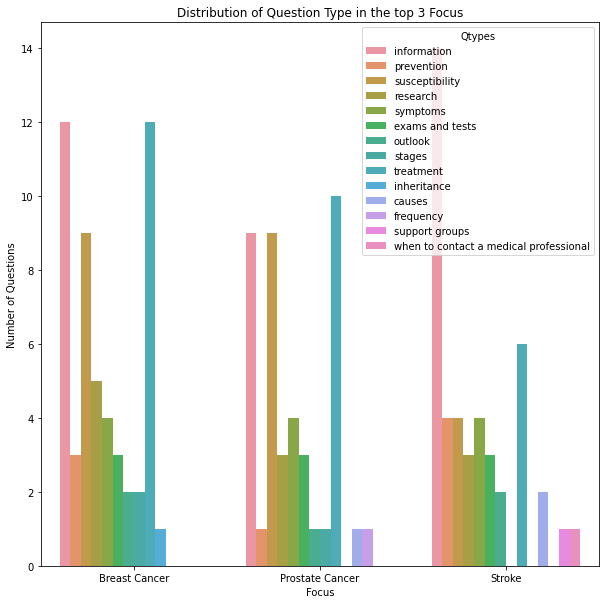

In [ ]:
plt.figure(figsize=[10,10])
sb.countplot(data = df_qf, x = 'Focus', hue = 'Qtypes') 
plt.title('Distribution of Question Type in the top 3 Focus');
plt.xlabel('Focus');
plt.ylabel ('Number of Questions');


The highest concern for people regarding the top asked focus is information and treatment.

### What are the top 3 question types and the least one asked regarding the top focus 'Breast Cancer' ?




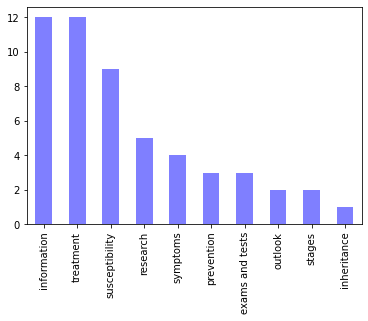

In [ ]:
df[df['Focus']=='Breast Cancer']['Qtypes'].value_counts().plot(kind='bar',alpha=0.5,color='blue');

The most asked question types regarding `Breast Cancer `is **information, treatment and susceptibility** while the least asked type of question is **inheritance**

### What are the relationship between missing values in 'Answers' and question types?

In [ ]:
df_null=df[df['Answers'].isna()]

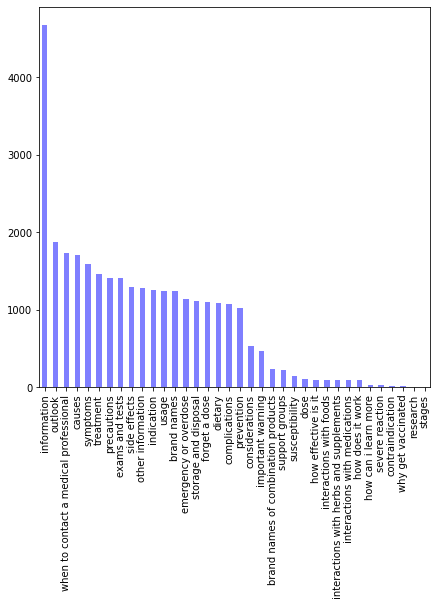

In [ ]:
plt.figure(figsize=[7,7])
top_Qtype_null=df_null['Qtypes'].value_counts().plot(kind='bar',alpha=0.5,color='blue')

The most question type with missing answers are in `'information'` question type and rest do not have that much difference.

The question type with the least missing answers is `'stages'`.

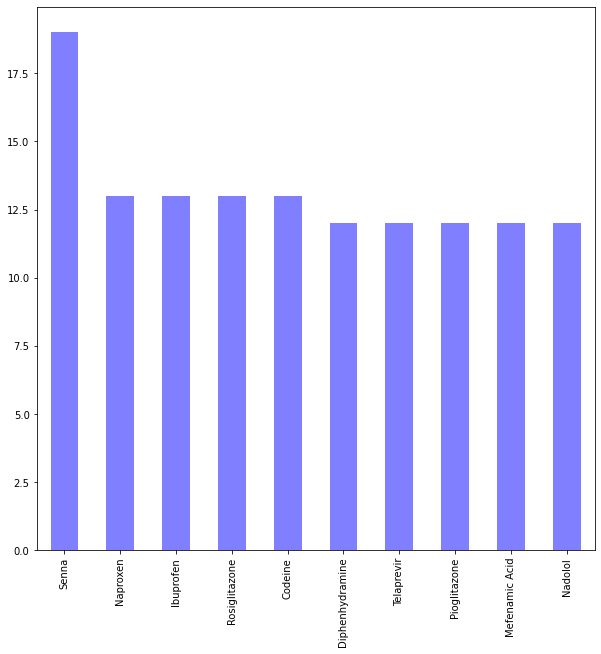

In [ ]:
plt.figure(figsize=[10,10])
top_Qfocus_null=df_null['Focus'].value_counts().head(10).plot(kind='bar',alpha=0.5,color='blue')

In the top 10 missing values in records, the question focus with most missing values is `'Senna'`

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
%matplotlib inline

#Exploratory Data Analysis (Testset)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Training/final_test.csv')

In [ ]:
df.head()

,Unnamed: 0,Questions,Answers,Focus,Qtypes,Synonym,source,url,cui,SemanticType,SemanticGroup
0,0,what is (are) chronic lymphocytic leukemia ?,Key Points\n - Chronic lymp...,Chronic Lymphocytic Leukemia,information,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
1,1,who is at risk for chronic lymphocytic leukemi...,Older age can affect the risk of developing ch...,Chronic Lymphocytic Leukemia,susceptibility,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
2,2,what are the symptoms of chronic lymphocytic l...,Signs and symptoms of chronic lymphocytic leuk...,Chronic Lymphocytic Leukemia,symptoms,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
3,3,how to diagnose chronic lymphocytic leukemia ?,"Tests that examine the blood, bone marrow, and...",Chronic Lymphocytic Leukemia,exams and tests,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
4,4,what is the outlook for chronic lymphocytic le...,Certain factors affect treatment options and p...,Chronic Lymphocytic Leukemia,outlook,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47441 entries, 0 to 47440
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     47441 non-null  int64 
 1   Questions      47441 non-null  object
 2   Answers        16407 non-null  object
 3   Focus          47427 non-null  object
 4   Qtypes         47441 non-null  object
 5   Synonym        24669 non-null  object
 6   source         47436 non-null  object
 7   url            47436 non-null  object
 8   cui            31417 non-null  object
 9   SemanticType   31375 non-null  object
 10  SemanticGroup  31417 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [ ]:
df.describe()

,Unnamed: 0
count,47441.000000
mean,23720.000000
std,13695.181397
min,0.000000
25%,11860.000000
50%,23720.000000
75%,35580.000000
max,47440.000000


In [ ]:
#We'll drop the index column as it is redundant
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Questions,Answers,Focus,Qtypes,Synonym,source,url,cui,SemanticType,SemanticGroup
0,what is (are) chronic lymphocytic leukemia ?,Key Points\n - Chronic lymp...,Chronic Lymphocytic Leukemia,information,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
1,who is at risk for chronic lymphocytic leukemi...,Older age can affect the risk of developing ch...,Chronic Lymphocytic Leukemia,susceptibility,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
2,what are the symptoms of chronic lymphocytic l...,Signs and symptoms of chronic lymphocytic leuk...,Chronic Lymphocytic Leukemia,symptoms,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
3,how to diagnose chronic lymphocytic leukemia ?,"Tests that examine the blood, bone marrow, and...",Chronic Lymphocytic Leukemia,exams and tests,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders
4,what is the outlook for chronic lymphocytic le...,Certain factors affect treatment options and p...,Chronic Lymphocytic Leukemia,outlook,NaN,CancerGov,https://www.cancer.gov/types/leukemia/patient/...,C0023434,T191,Disorders


In [ ]:
#Dataframe size
df.shape

(47441, 10)

In [ ]:
df.columns

Index(['Questions', 'Answers', 'Focus', 'Qtypes', 'Synonym', 'source', 'url',
       'cui', 'SemanticType', 'SemanticGroup'],
      dtype='object')

## Check null values

In [ ]:
#Check the summation of missing values
total_nulls=df.isnull().sum()
total_nulls

Questions            0
Answers          31034
Focus               14
Qtypes               0
Synonym          22772
source               5
url                  5
cui              16024
SemanticType     16066
SemanticGroup    16024
dtype: int64

In [ ]:
null_percent=(total_nulls/df.isnull().count()*100)

#Let's sort the attributes in descending order according to their missing values
missing_data=pd.DataFrame({'Total_Missing':total_nulls,'Missing_Percent': null_percent})
missing_data=missing_data.sort_values(by='Total_Missing', ascending=False)
missing_data

,Total_Missing,Missing_Percent
Answers,31034,65.415990
Synonym,22772,48.000675
SemanticType,16066,33.865222
cui,16024,33.776691
SemanticGroup,16024,33.776691
Focus,14,0.029510
source,5,0.010539
url,5,0.010539
Questions,0,0.000000
Qtypes,0,0.000000


In [ ]:
columns=missing_data['Missing_Percent'].index.tolist()
len(columns[:-2])

8

In [ ]:
sorted_counts = missing_data['Missing_Percent'].tolist()
len(sorted_counts[:-2])

8

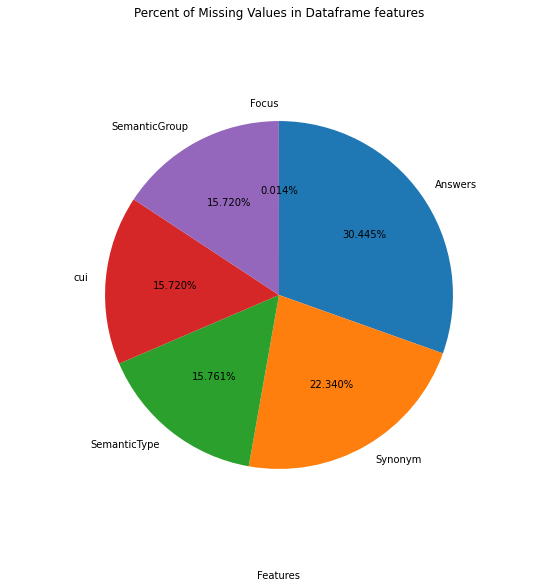

In [ ]:
plt.figure(figsize=[10,10])
sorted_counts = missing_data['Missing_Percent'].tolist()
plt.pie(sorted_counts[:-4], labels = columns[:-4],  autopct='%.3f%%', startangle = 90, counterclock = False,radius=0.8);
plt.title('Percent of Missing Values in Dataframe features')
plt.xlabel('Features')
plt.show()


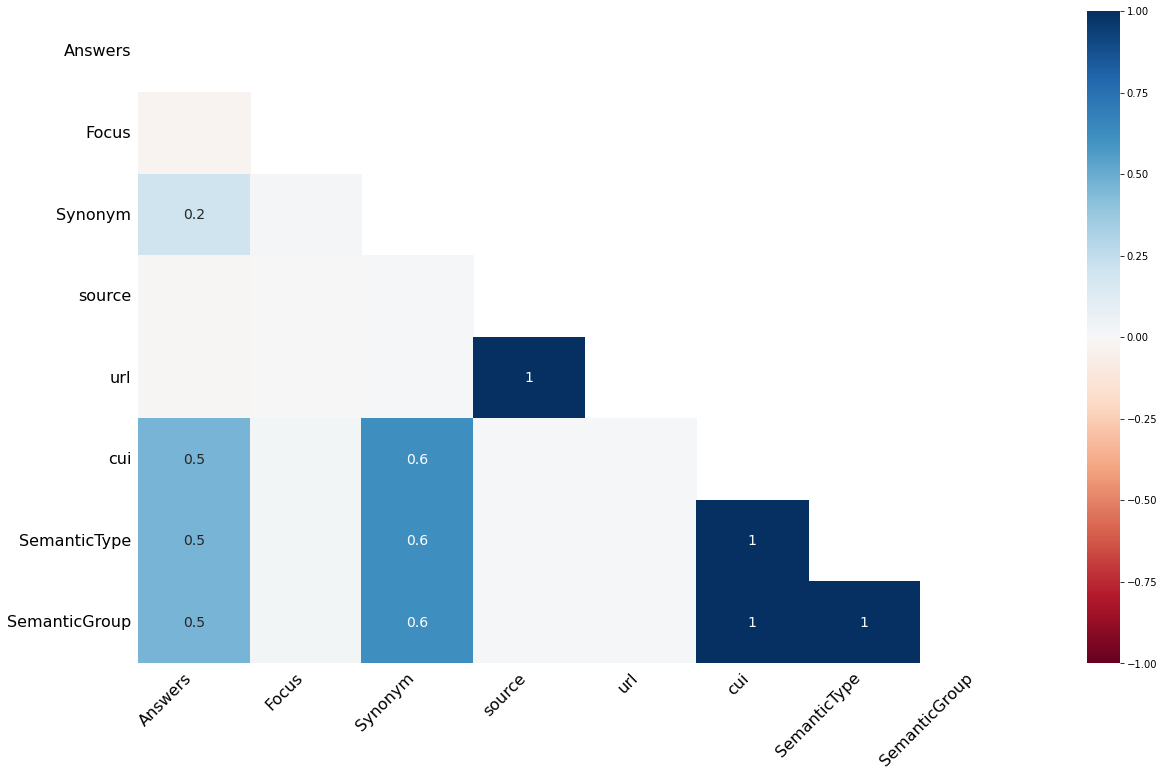

In [ ]:
#Correlation Analysis of missing values
msno.heatmap(df);

There are two columns contain null values: `'Answers'` and `'Focus'`

Column `'Answers'` has 31034 missing records which means this record has no useful informartion for us so we will drop it.

#Checking Duplicates
We will focus only on question and answer

In [ ]:
#Summtion of full duplicates
df.duplicated().sum()

561

In [ ]:
#Full duplicates
df[df.duplicated()]

,Questions,Answers,Focus,Qtypes,Synonym,source,url,cui,SemanticType,SemanticGroup
1567,what is (are) proctitis ?,Proctitis is inflammation of the lining of the...,Proctitis,information,NaN,NIDDK,http://www.niddk.nih.gov/health-information/he...,C0033246,T047,Disorders
1569,what causes proctitis ?,"Proctitis has many causes, including acute, or...",Proctitis,causes,NaN,NIDDK,http://www.niddk.nih.gov/health-information/he...,C0033246,T047,Disorders
1610,how to diagnose kidney disease of diabetes ?,People with diabetes should be screened regula...,Kidney Disease of Diabetes,exams and tests,NaN,NIDDK,http://www.niddk.nih.gov/health-information/he...,C0011860,T047,Disorders
1612,how to prevent kidney disease of diabetes ?,Blood Pressure Medicines\n \nSc...,Kidney Disease of Diabetes,prevention,NaN,NIDDK,http://www.niddk.nih.gov/health-information/he...,C0011860,T047,Disorders
1614,what to do for kidney disease of diabetes ?,- Diabetes is the leading cause of chronic kid...,Kidney Disease of Diabetes,considerations,NaN,NIDDK,http://www.niddk.nih.gov/health-information/he...,C0011860,T047,Disorders
...,...,...,...,...,...,...,...,...,...,...
47274,what to do for scrotal swelling ?,NaN,Scrotal swelling,considerations,<Synonym>Swelling of the scrotum</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0282005,T184,Disorders
47319,what are the treatments for chiropractic care ...,NaN,Chiropractic care for back pain,treatment,NaN,ADAM,https://www.nlm.nih.gov/medlineplus/ency/patie...,C0580931,T033,Disorders
47357,what to do for bleeding ?,NaN,Bleeding,considerations,<Synonym>Blood loss</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0019080,T046,Disorders
47358,what to do for bleeding ?,NaN,Bleeding,considerations,<Synonym>Blood loss</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0019080,T046,Disorders


In [ ]:
QA_df=df[['Questions','Answers']].copy()
QA_df[QA_df.duplicated()]

,Questions,Answers
1567,what is (are) proctitis ?,Proctitis is inflammation of the lining of the...
1569,what causes proctitis ?,"Proctitis has many causes, including acute, or..."
1610,how to diagnose kidney disease of diabetes ?,People with diabetes should be screened regula...
1612,how to prevent kidney disease of diabetes ?,Blood Pressure Medicines\n \nSc...
1614,what to do for kidney disease of diabetes ?,- Diabetes is the leading cause of chronic kid...
...,...,...
47274,what to do for scrotal swelling ?,NaN
47319,what are the treatments for chiropractic care ...,NaN
47357,what to do for bleeding ?,NaN
47358,what to do for bleeding ?,NaN


There are 586 duplicates of both questions and answers

In [ ]:
QA_df[QA_df.duplicated()]

### Question type column

In [ ]:
df['Qtypes'].value_counts()

information                                9214
symptoms                                   4338
treatment                                  3906
causes                                     2436
outlook                                    2232
exams and tests                            2058
when to contact a medical professional     1738
inheritance                                1446
precautions                                1413
side effects                               1301
other information                          1280
indication                                 1258
usage                                      1244
prevention                                 1239
brand names                                1238
emergency or overdose                      1140
complications                              1120
frequency                                  1120
storage and disposal                       1117
forget a dose                              1098
dietary                                 

In [ ]:
df['Qtypes'].nunique()

39

#Distribution of Question types.

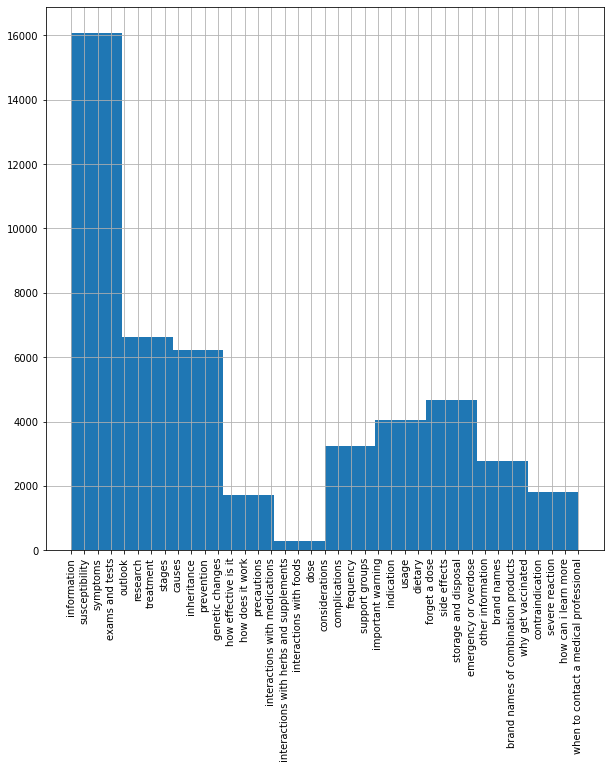

In [ ]:
plt.figure(figsize=[10,10]);
df['Qtypes'].hist();
plt.xticks(rotation = 90);

### What are the top 10 frequent question type asked?

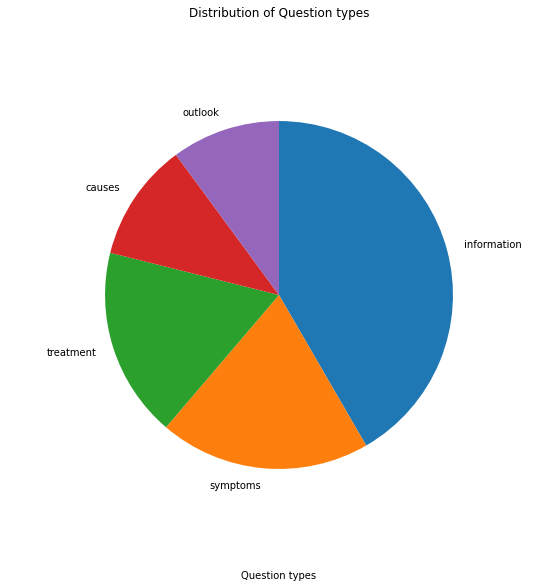

In [ ]:
plt.figure(figsize=[10,10])
sorted_counts = df['Qtypes'].value_counts().head()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,radius=0.8);
#top_Qtype=df['Qtypes'].value_counts().head(10).plot(kind='bar',alpha=0.5,color='blue')
plt.title('Distribution of Question types')
plt.xlabel('Question types')
plt.show()


In [ ]:
list(df['Qtypes'].value_counts()[:10].keys())

['information',
 'symptoms',
 'treatment',
 'causes',
 'outlook',
 'exams and tests',
 'when to contact a medical professional',
 'inheritance',
 'precautions',
 'side effects']

Top 10 question types are: `['information',
 'symptoms',
 'treatment',
 'causes',
 'outlook',
 'exams and tests',
 'when to contact a medical professional',
 'inheritance',
 'precautions',
 'side effects']`



In [ ]:
df['Focus'].nunique()

10537

###What are the top 10 frequent question focus?

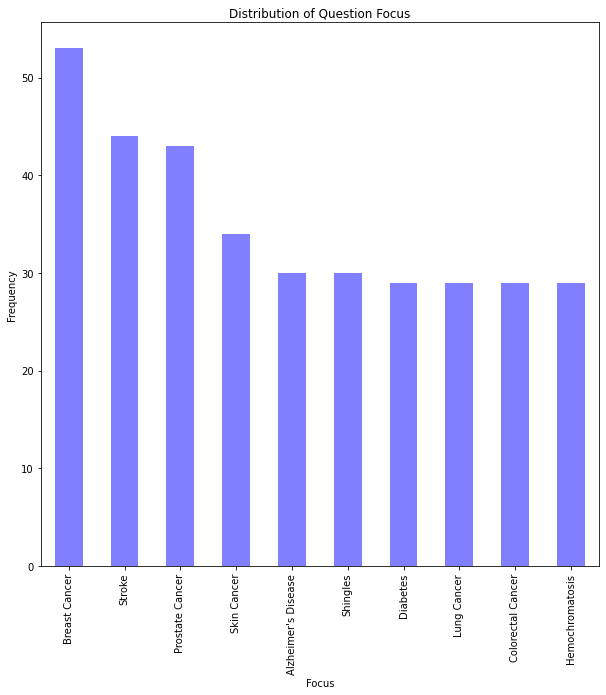

In [ ]:
plt.figure(figsize=[10,10])
top_Qtype=df['Focus'].value_counts().head(10).plot(kind='bar',alpha=0.5,color='blue')
plt.title('Distribution of Question Focus')
plt.xlabel('Focus')
plt.ylabel('Frequency')
plt.show()

In [ ]:
list(df['Focus'].value_counts()[:3].keys())

['Breast Cancer', 'Stroke', 'Prostate Cancer']

Top 10 question focus are: `['Breast Cancer',
 'Stroke',
 'Prostate Cancer',
 'Skin Cancer',
 "Alzheimer's Disease",
 'Shingles',
 'Diabetes',
 'Lung Cancer',
 'Colorectal Cancer',
 'Hemochromatosis']`
 

### What are the question types regarding the top 3 focus?

In [ ]:
df_qf=df[(df['Focus']=='Breast Cancer') | (df['Focus']=='Stroke') | (df['Focus']=='Prostate Cancer')]
df_qf
#df_qf=df[(df['Focus']=='Breast Cancer') | (df['Focus']=='Stroke') | (df['Focus']=='Prostate Cancer') | (df['Qtypes']=='information') | (df['Qtypes']=='symptoms') | (df['Qtypes']=='treatment')]

,Questions,Answers,Focus,Qtypes,Synonym,source,url,cui,SemanticType,SemanticGroup
133,what is (are) breast cancer ?,Key Points\n - Breast cance...,Breast Cancer,information,NaN,CancerGov,https://www.cancer.gov/types/breast/patient/br...,C0006142,T191,Disorders
134,how to prevent breast cancer ?,Key Points\n - Avoiding ris...,Breast Cancer,prevention,NaN,CancerGov,https://www.cancer.gov/types/breast/patient/br...,C0006142,T191,Disorders
135,who is at risk for breast cancer? ?,Key Points\n - Avoiding ris...,Breast Cancer,susceptibility,NaN,CancerGov,https://www.cancer.gov/types/breast/patient/br...,C0006142,T191,Disorders
136,what research (or clinical trials) is being do...,Cancer prevention clinical trials are used to ...,Breast Cancer,research,NaN,CancerGov,https://www.cancer.gov/types/breast/patient/br...,C0006142,T191,Disorders
137,what is (are) breast cancer ?,Key Points\n - Breast cance...,Breast Cancer,information,NaN,CancerGov,https://www.cancer.gov/types/breast/patient/pr...,C0006142,T191,Disorders
...,...,...,...,...,...,...,...,...,...,...
45259,what are the treatments for stroke ?,NaN,Stroke,treatment,<Synonym>Cerebrovascular disease</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0038454,T047,Disorders
45260,where to find support for people with stroke ?,NaN,Stroke,support groups,<Synonym>Cerebrovascular disease</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0038454,T047,Disorders
45261,what is the outlook for stroke ?,NaN,Stroke,outlook,<Synonym>Cerebrovascular disease</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0038454,T047,Disorders
45262,do i need to see a doctor for stroke ?,NaN,Stroke,when to contact a medical professional,<Synonym>Cerebrovascular disease</Synonym>,ADAM,https://www.nlm.nih.gov/medlineplus/ency/artic...,C0038454,T047,Disorders


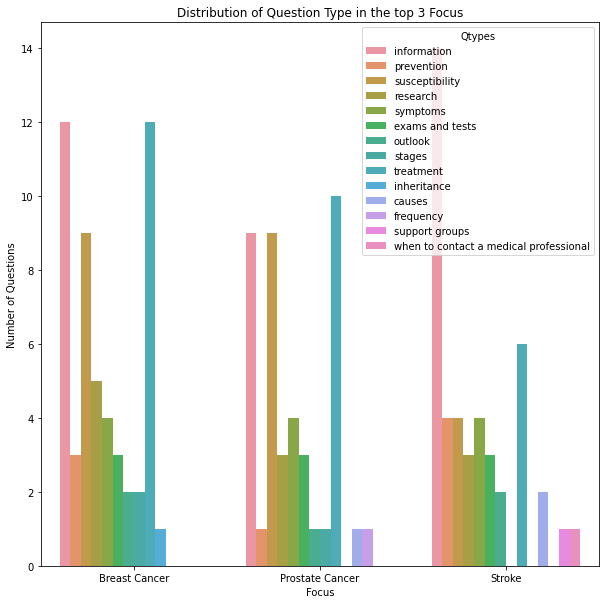

In [ ]:
plt.figure(figsize=[10,10])
sb.countplot(data = df_qf, x = 'Focus', hue = 'Qtypes') 
plt.title('Distribution of Question Type in the top 3 Focus');
plt.xlabel('Focus');
plt.ylabel ('Number of Questions');


The highest concern for people regarding the top asked focus is information and treatment.

### What are the top 3 question types and the least one asked regarding the top focus 'Breast Cancer' ?




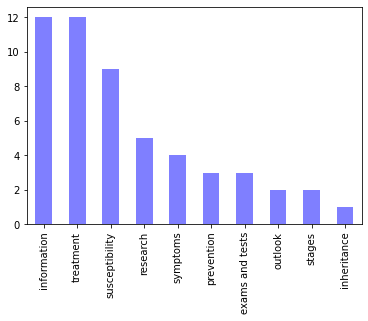

In [ ]:
df[df['Focus']=='Breast Cancer']['Qtypes'].value_counts().plot(kind='bar',alpha=0.5,color='blue');

The most asked question types regarding `Breast Cancer `is **information, treatment and susceptibility** while the least asked type of question is **inheritance**

### What are the relationship between missing values in 'Answers' and question types?

In [ ]:
df_null=df[df['Answers'].isna()]

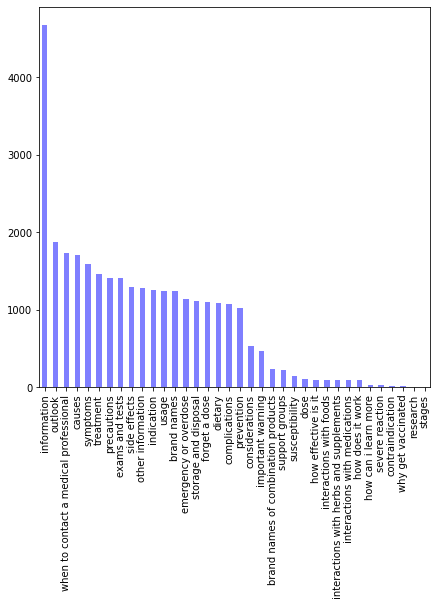

In [ ]:
plt.figure(figsize=[7,7])
top_Qtype_null=df_null['Qtypes'].value_counts().plot(kind='bar',alpha=0.5,color='blue')

The most question type with missing answers are in `'information'` question type and rest do not have that much difference.

The question type with the least missing answers is `'stages'`.

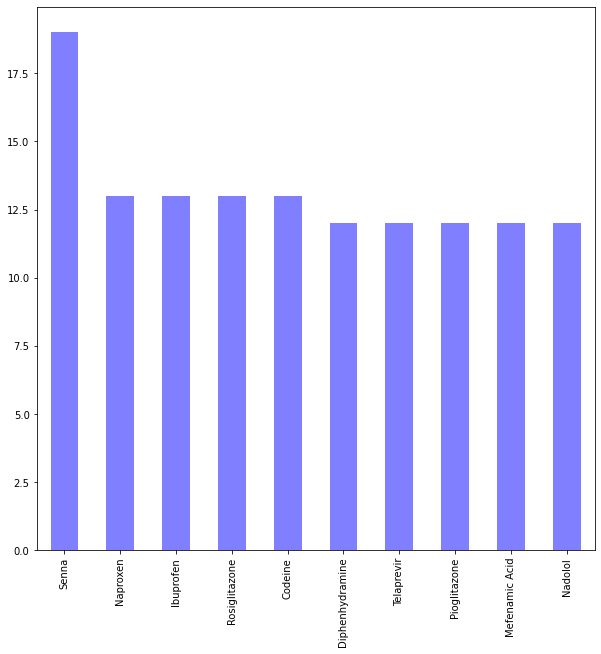

In [ ]:
plt.figure(figsize=[10,10])
top_Qfocus_null=df_null['Focus'].value_counts().head(10).plot(kind='bar',alpha=0.5,color='blue')

In the top 10 missing values in records, the question focus with most missing values is `'Senna'`